In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [84]:
print(X_train.shape) # 60000 images 28x28
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


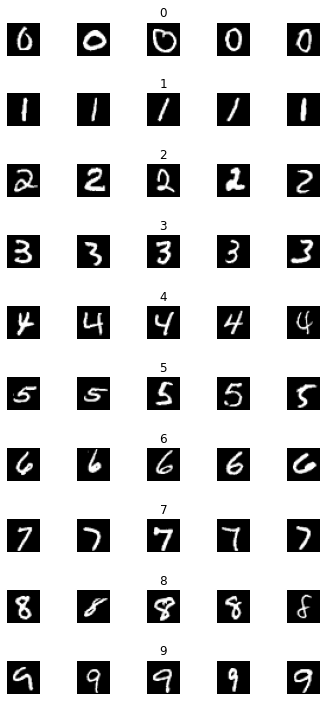

In [86]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[ y_train == j ]    # get images corresponding to the row number
#         select random element from filtered images with range from (0, max_length-1)
#         change colour map (cmap) to grayscale
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1), : ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")    # turns off axis labels
        if i==2:
            axs[j][i].set_title(str(j))   # display labels in the middle column
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

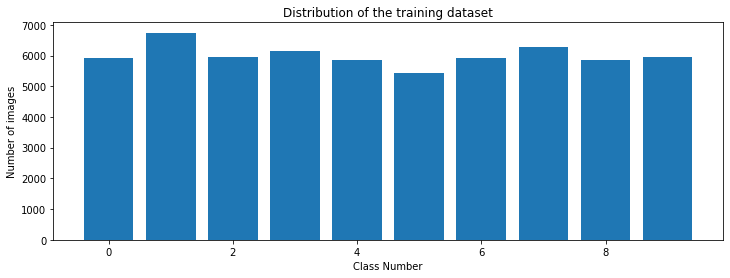

In [87]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)     # one-hot encoding
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255    # normalising the intensities of each pixel
X_test = X_test/255

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
# define LeNet model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(filters=30, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=500, activation='relu'))
    model.add(Dropout(0.5))    # added where the parameters are large
    model.add(Dense(units=num_classes, activation='softmax'))
    adam = Adam(lr=0.01)
    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

In [92]:
model = leNet_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [93]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2237 - accuracy: 0.9272 - val_loss: 0.0436 - val_accuracy: 0.9870
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0485 - val_accuracy: 0.9865
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0348 - val_accuracy: 0.9912
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 7/10
54000/54000 [==============================] - 1s 17us/ste

Text(0.5, 0, 'Epoch')

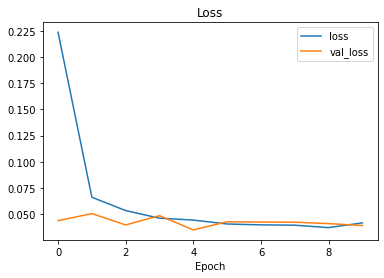

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

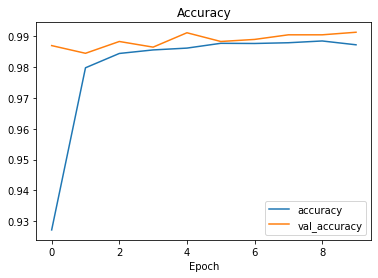

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

<Response [200]>


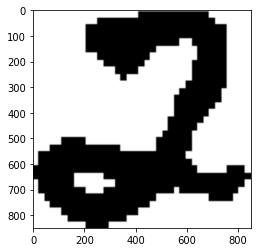

In [96]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

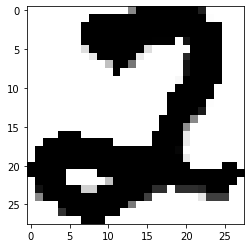

In [97]:
import cv2

img_array = np.asarray(img)
# print(img_array.shape)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
image = cv2.bitwise_not(gray_scale)

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [99]:
prediction = model.predict_classes(image)
print("Predicted Digit: ", str(prediction))

Predicted Digit:  [2]


In [100]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.04076916346898831
Test accuracy:  0.9902999997138977


In [118]:
# visualise first convolutional layer
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
# visualise second convolutional layer
# layer2 = Model(inputs=model.layers[2].input, outputs=model.layers[2].output)

visual_layer1 = layer1.predict(image)
print(visual_layer1.shape)

(1, 24, 24, 30)


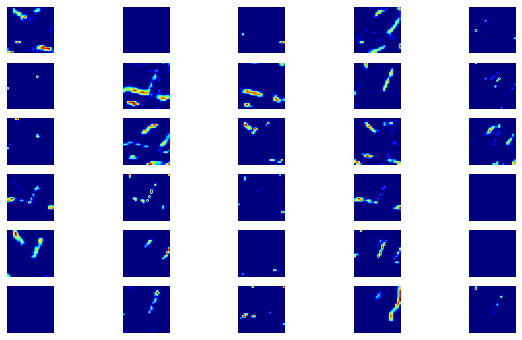

In [116]:
plt.figure(figsize=(10,6))
for i in range(30):   # corresponds to shape of visual_layer
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')